In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.signal
from utils import audio, channels, synchronize

cwd = os.getcwd()

In [ ]:
# Sync with chirp through octagon
chirp_duration = 1
fs = 48000
double_chirp = True

sample_times = np.linspace(0, chirp_duration, fs * chirp_duration)
chirp = scipy.signal.chirp(sample_times, 20, chirp_duration, 10000)
reverse_chirp = chirp[::-1]

if double_chirp:
    received_signal, samplerate = audio.wav_to_signal("double_chirp_octagon", os.path.join(cwd, "audio_files"))
else:
    received_signal, samplerate = audio.wav_to_signal("single_chirp_octagon", os.path.join(cwd, "audio_files"))

convolved = np.convolve(received_signal, reverse_chirp)

plt.plot(convolved)
plt.show(block=False)



Start recording for 10 seconds...
Finish recording


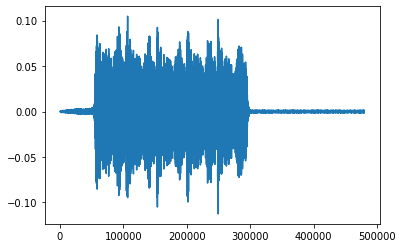

In [2]:
# Sync with real channel
chirp_duration = 1
record_duration = 10
fs = 48000
double_chirp = True

received_signal = audio.record(record_duration, fs)
start,convolved = synchronize.chirp_synchronize(received_signal,fs)



In [3]:
#  save recorded audio
audio.signal_to_wav(received_signal,fs,'received_multiple',"audio_files")


In [4]:
#load recorded signals
received_signal,fs = np.array(audio.wav_to_signal('received_multiple','audio_files'))
start,convolved = synchronize.chirp_synchronize(received_signal,fs)



C:\Users\17927\AppData\Local\Temp/ipykernel_13260/1711369950.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  received_signal,fs = np.array(audio.wav_to_signal('received_multiple','audio_files'))


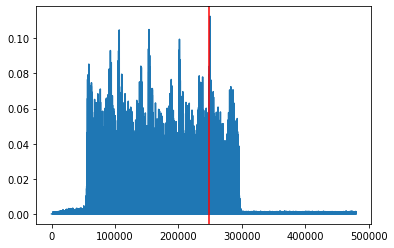

In [5]:
plt.plot(abs(received_signal))
plt.axvline(x=start, color='r')
plt.show(block=False)

[104138 152141 200142 248145 296148] [48003 48001 48003 48003] 48002.5


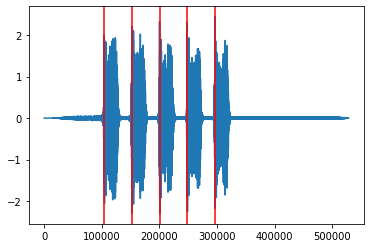

In [7]:
event = np.array(synchronize.impulse_detect(convolved,fs,duration = 1,window_time=0.01,threshold=3))
diff = event[1:]-event[:-1]
print(event, diff, np.mean(diff))

plt.plot(convolved)
for pos in event:
    plt.axvline(x = pos, color = 'r')
plt.show()

In [ ]:
plt.plot(np.fft.fft(convolved))
#plt.plot(convolved)
plt.show()